In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# machine learning
from sklearn.linear_model import LogisticRegression

# Any results you write to the current directory are saved as output.

['HappinessData.csv', 'HappinessData.xls']


<h1> EDA for the Happiness data </h1>

This is also an attempt to see if this website (Kaggle) is a good place to collaborate within a small team on a dataset

<h2> Checking the import of the data </h2>

This section checks that the data that I uploaded is imported as expected into the dataframe. I am expecting that:
- There are ten fields: Area (of London), Happiness score, Year, No Religion (%), No Sport, Childhood Obesity, CPP, Suicide Rates, Road Accidents and Crime Rates;
- There are 33 areas of London;
- The Happiness Scores are...;
- The Years are 2011-2016;
- No Religion is a percentage;
- Childhood obesity is a percentage;
- CPP is...;
- Suicide rate is ...;
- Road Accidents is an integer greater than or equal to zero;
- Crime Rates is a percentage.


In [120]:
#Load data
df = pd.read_csv("../input/HappinessData.csv")

#look at first few rows
df.head()

,Area,Happiness,Year,No Religion (%),No Sport,Childhood Obesity,CPP,Suicide Rates,Road Accidents,Crime Rates
0,City of London,x,2011,-,59.40%,NaN,21,3,NaN,NaN
1,Barking and Dagenham,6.91,2011,19.2,61.10%,26.9,55,10,NaN,100.7
2,Barnet,7.26,2011,20.0,49.20%,19.2,27,22,NaN,73.5
3,Bexley,7.22,2011,25.0,51.00%,22.2,16,16,NaN,52.3
4,Brent,7.07,2011,11.7,61.20%,22.6,37,20,NaN,101.2


In [121]:
print(df.columns.values)

['Area' 'Happiness' 'Year' 'No Religion (%)' 'No Sport'
 'Childhood Obesity' 'CPP' 'Suicide Rates' 'Road Accidents' 'Crime Rates']


In [122]:
#look at any information that needs to be cleaned
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
Area                 198 non-null object
Happiness            198 non-null object
Year                 198 non-null int64
No Religion (%)      198 non-null object
No Sport             198 non-null object
Childhood Obesity    192 non-null float64
CPP                  198 non-null object
Suicide Rates        198 non-null int64
Road Accidents       66 non-null float64
Crime Rates          192 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 15.5+ KB


Area                  33
Happiness             71
Year                   6
No Religion (%)      150
No Sport             142
Childhood Obesity     99
CPP                   49
Suicide Rates         36
Road Accidents        30
Crime Rates          174
dtype: int64

<h2> Baseline the data in a very straightforward way </h2>

In order to baseline the work and not overthink the data cleaning, I decided to do the following:
- remove the Road Accidents column, there are too many NaNs
- remove the City of London rows, too much missing data
- remove CPP, don't know how to handle the missing data, yet

In [123]:
# Implement drops
df.drop('Road Accidents', axis=1, inplace=True)
df.drop('CPP', axis=1, inplace=True)
df.drop(df[df.Area == 'City of London'].index, inplace=True)
# Check that it worked
df.head()

,Area,Happiness,Year,No Religion (%),No Sport,Childhood Obesity,Suicide Rates,Crime Rates
1,Barking and Dagenham,6.91,2011,19.2,61.10%,26.9,10,100.7
2,Barnet,7.26,2011,20.0,49.20%,19.2,22,73.5
3,Bexley,7.22,2011,25.0,51.00%,22.2,16,52.3
4,Brent,7.07,2011,11.7,61.20%,22.6,20,101.2
5,Bromley,7.44,2011,24.6,47.70%,15.6,22,70.5


In [135]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 1 to 197
Data columns (total 8 columns):
Area                 192 non-null object
Happiness            192 non-null float32
Year                 192 non-null int64
No Religion (%)      192 non-null float32
No Sport             192 non-null float32
Childhood Obesity    192 non-null float64
Suicide Rates        192 non-null int64
Crime Rates          192 non-null float32
dtypes: float32(4), float64(1), int64(2), object(1)
memory usage: 10.5+ KB


Area                  32
Happiness             70
Year                   6
No Religion (%)      149
No Sport             138
Childhood Obesity     99
Suicide Rates         32
Crime Rates          174
dtype: int64

Need to cast some of the data to numbers and remove text (%)

In [125]:
df.Happiness = df.Happiness.astype('float32')
df['No Religion (%)'] = df['No Religion (%)'].astype('float32')
df['No Sport'].replace('%','', regex=True, inplace=True)
df['No Sport'] = df['No Sport'].astype('float32')
df['Crime Rates'] = df['Crime Rates'].astype('float32')
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 1 to 197
Data columns (total 8 columns):
Area                 192 non-null object
Happiness            192 non-null float32
Year                 192 non-null int64
No Religion (%)      192 non-null float32
No Sport             192 non-null float32
Childhood Obesity    192 non-null float64
Suicide Rates        192 non-null int64
Crime Rates          192 non-null float32
dtypes: float32(4), float64(1), int64(2), object(1)
memory usage: 10.5+ KB


Area                  32
Happiness             70
Year                   6
No Religion (%)      149
No Sport             138
Childhood Obesity     99
Suicide Rates         32
Crime Rates          174
dtype: int64

In [126]:
# Check if there are any NaN values left in the dataframe
df.isnull().any().any()

False

<h2> Some visualisations </h2>
- Reviewed some sumamry statistics of the data
- Plotted the Happiness versus year, which appeared to show a vague trend that people are getting happier


In [127]:
df.describe()

,Happiness,Year,No Religion (%),No Sport,Childhood Obesity,Suicide Rates,Crime Rates
count,192.000000,192.00000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,7.330156,2013.50000,25.017189,50.007812,22.452083,18.421875,86.993767
std,0.183906,1.71229,8.322256,6.160181,3.505911,6.856353,35.552242
min,6.810000,2011.00000,7.600000,33.500000,11.100000,4.000000,45.000000
25%,7.197500,2012.00000,19.150001,45.500000,20.600000,14.000000,65.625002
50%,7.330000,2013.50000,25.450000,50.049999,22.900000,18.000000,78.600002
75%,7.472500,2015.00000,31.449999,54.025000,24.825000,22.000000,100.100000
max,7.910000,2016.00000,42.900002,67.000000,29.600000,45.000000,302.000000


In [128]:
df.describe(include=['O'])

,Area
count,192
unique,32
top,Hackney
freq,6


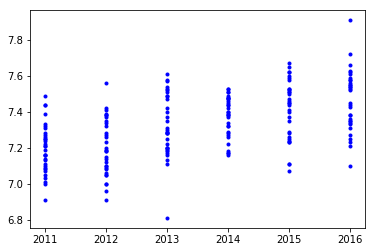

In [129]:
# 2D plot between Happiness and year
plt.plot(df.Year,df['Happiness'], 'b.')

Text(0,0.5,'Happiness')

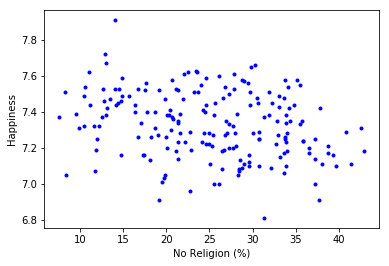

In [137]:
plt.plot(df['No Religion (%)'], df.Happiness,'b.')
plt.xlabel('No Religion (%)')
plt.ylabel('Happiness')

Text(0,0.5,'Happiness')

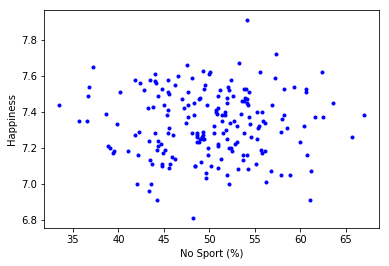

In [138]:
plt.plot(df['No Sport'], df.Happiness,'b.')
plt.xlabel('No Sport (%)')
plt.ylabel('Happiness')

Text(0,0.5,'Happiness')

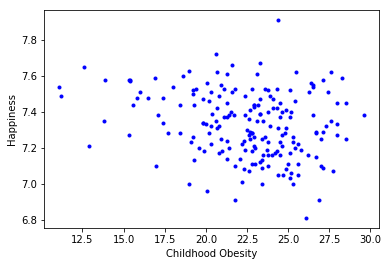

In [139]:
plt.plot(df['Childhood Obesity'], df.Happiness,'b.')
plt.xlabel('Childhood Obesity')
plt.ylabel('Happiness')

Text(0,0.5,'Happiness')

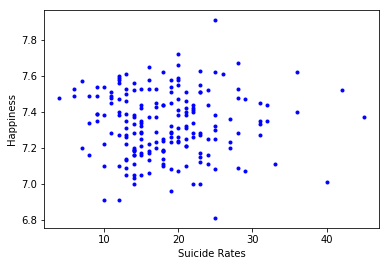

In [140]:
plt.plot(df['Suicide Rates'], df.Happiness,'b.')
plt.xlabel('Suicide Rates')
plt.ylabel('Happiness')

Text(0,0.5,'Happiness')

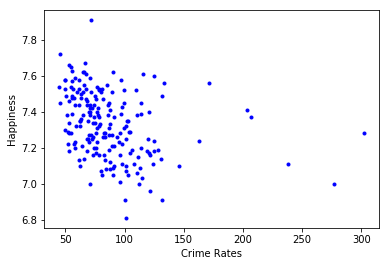

In [141]:
plt.plot(df['Crime Rates'], df.Happiness,'b.')
plt.xlabel('Crime Rates')
plt.ylabel('Happiness')

<h1> Creating test and training sets </h1>
- Split the data into training and test data
- Take data for 2016 as the test data, take data for 2011-2015 as the training data

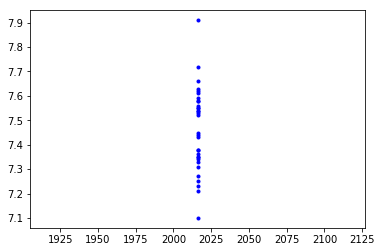

In [130]:
test_df = df[df.Year==2016]
plt.plot(test_df.Year,test_df['Happiness'], 'b.')

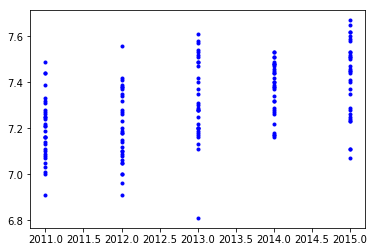

In [131]:
train_df = df[df.Year!=2016]
plt.plot(train_df.Year,train_df['Happiness'], 'b.')

<h2> Building a baseline based on the training data </h2>

In [132]:
X_train = train_df.drop(["Happiness", "Area"], axis=1)
Y_train = train_df["Happiness"] > 7.2 # Assume that if score is above 7.2, they are happy
X_test  = test_df.drop(["Happiness", "Area"], axis=1).copy()
Y_test = test_df["Happiness"] > 7.2 # Assume that if score is above 7.2, they are happy
X_train.shape, Y_train.shape, X_test.shape

((160, 6), (160,), (32, 6))

<h2> Logistic Regression Model </h2>

In [133]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

71.88

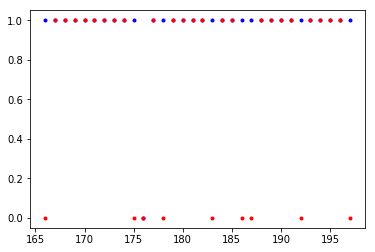

In [134]:
plt.plot(X_test.index, Y_test, 'b.', label="Test data")
plt.plot(X_test.index, Y_pred, 'r.', label="Predicted data")